Interesting link <a href="https://yanirseroussi.com/2015/07/06/learning-about-deep-learning-through-album-cover-classification/">Album Cover CNN </a> <a href="https://github.com/yanirs/bandcamp-deep-learning/">GIT</a>
<br />
Caffe example: <a href="https://github.com/yanirs/bandcamp-deep-learning/blob/master/notebooks/02-caffe-games.ipynb">Yanirs caffe2 pretrained model</a>
<br />
<a href="https://github.com/caffe2/models">Caffe2 models</a>
<br />
<a href="https://github.com/caffe2/tutorials/blob/master/Loading_Pretrained_Models.ipynb">Loading pre-trained models in Caffe2</a>
<br/>
<a href="https://caffe2.ai/docs/tutorial-MNIST.html">CNN Caffe2 Tutorial</a>
<br />
<a href="https://towardsdatascience.com/the-softmax-function-neural-net-outputs-as-probabilities-and-ensemble-classifiers-9bd94d75932">How to use softmax output layer</a>

# Network

In [3]:
import pandas as pd
df = pd.read_csv('output_resnext101.csv')
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

df2 = df#df[df.genre.isin(['metal', 'folk', 'jazz'])]
# 10 Genres
n_classes = len(df2.genre.unique())
Y = df2.genre
X = df2.iloc[:, 0:1000]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
labels = list(encoder.inverse_transform(range(0,n_classes)))
# encoded_Y = keras.utils.to_categorical(encoded_Y)
binarized_Y = label_binarize(encoded_Y, classes=range(0,n_classes))
X_train, X_test, Y_train, Y_test = train_test_split(X, binarized_Y, test_size=0.33)
labels
n_classes

10

In [5]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# Model has an input_dimension of 1000 (all the words)
model.add(Dense(1000, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

adm = Adam(lr=0.0001, beta_1=0.7, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=adm,
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=90,
          batch_size=50)

score = model.evaluate(X_test, Y_test, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/90
6535/6535 [==============================] - 2s 263us/step - loss: 2.7044 - acc: 0.0955
Epoch 2/90
6535/6535 [==============================] - 2s 232us/step - loss: 2.3508 - acc: 0.1011
Epoch 3/90
6535/6535 [==============================] - 1s 228us/step - loss: 2.3230 - acc: 0.0984
Epoch 4/90
6535/6535 [==============================] - 2s 231us/step - loss: 2.3112 - acc: 0.1034
Epoch 5/90
6535/6535 [==============================] - 1s 228us/step - loss: 2.3064 - acc: 0.1050
Epoch 6/90
6535/6535 [==============================] - 2s 230us/step - loss: 2.3053 - acc: 0.1016
Epoch 7/90
6535/6535 [==============================] - 2s 234us/step - loss: 2.3072 - acc: 0.1036
Epoch 8/90
6535/6535 [==============================] - 2s 243us/step - loss: 2.3060 - acc: 0.1036
Epoch 9/90
6535/6535 [==============================] - 2s 233us/step - loss: 2.3038 - acc: 0.1021
Epoch 10/90
6535/6535 [==============================] - 2s 2

In [6]:
score

[2.3098248880670176, 0.09785647716913656]

In [9]:
import numpy as np
y_score = model.predict(X_test, batch_size=128)
encoder.inverse_transform([np.argmax(y_score[0]), np.argmax(Y_test[0])])

array(['metal', 'folk'], dtype=object)

## Validate Model

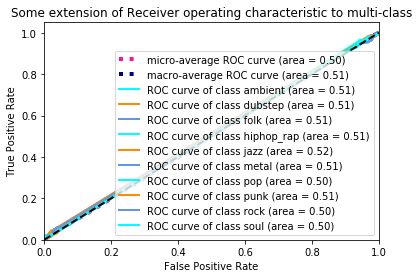

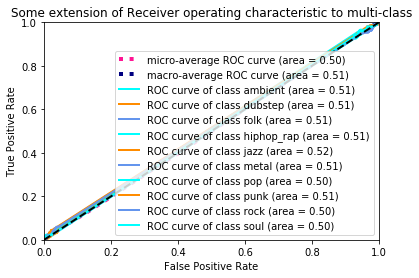

In [12]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


plt.figure(2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
